### SVM: classification and regression problems

In [1]:
from sklearn import datasets
iris=datasets.load_iris() # iris dataset
digits = datasets.load_digits() #digits dataset

In [2]:
print(digits.data) #all data in dictionnary like display

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(digits.target) #Ys

[0 1 2 ... 8 9 8]


In [5]:
digits.images[0]# one image, x

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
#predicts to which digit it corresponds (10 possible classes: numbers from 0 to 9)
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf= svm.SVC(gamma=0.001, C=100)#gamma= kernel coef; C= regularization parameter
## Training model on all data except the last item using cross validation
scores= cross_val_score(clf, digits.data[:-1], digits.target[:-1], cv=5)#leaving out one instance for test
#clf.fit(digits.data[:-1], digits.target[:-1])
scores

array([0.97777778, 0.94986072, 0.98328691, 0.98607242, 0.9637883 ])

In [13]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.01


In [17]:
#prediction on unseen (last digit)
clf.predict(digits.data[-1:])
#array([8])

array([8])

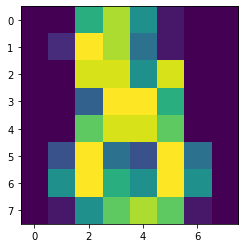

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt
           
plt.imshow(digits.images[-1], interpolation='nearest')
plt.show()

### K-Nearest-Neighbour : Supervised - Classification

In [ ]:
X= [[0],[1],[2],[3]]
y= [0,0,1,1]
from sklearn.neighbors import KNeighborsClassifier
neigh= KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
print(neigh.predict([[1.1]]))#predicts the class label
print(neigh.predict_proba([[0.9]]))#return proba estimates of belonging to a class for the test data

###  Logistic regression : Supervised - classification

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X,y= load_iris(return_X_y=True)
clf=LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2,:])
clf.predict_proba(X[:2,:])
clf.score(X, y)#mean accuracy on the given test data and labels

### K Means Clustering: Unsupervised - Clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans=KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.predict([[0,0], [12,3]]))
print(kmeans.cluster_centers_)#coordinates of cluster centers


# Standardize inputs

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

#one hot for multiclass classification, binary:
y = LabelBinarizer().fit_transform(y)

#one hot for multilabel classification:
y = MultiLabelBinarizer().fit_transform(y)

# Losses functions to use

In [ ]:
# Best losses functions for:
# Regression : MSE
# Classification : Cross entropy

# Implementations

### RandomForestRegressor
random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [35]:
#Load packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #help to select between different models
#from sklearn.externals import joblib
import joblib
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
from sklearn.datasets import load_wine
data = load_wine()
#type(data)
#convert into dataframe: wine= pd.read_csv('winequality_red.csv'), OR:
wine = pd.DataFrame(data=data.data, columns=data.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [37]:
#creation of quality
#wine["Quality"] = wine["color_intensity"].apply(lambda val: "Good" if val < 2  else "Standard")

In [48]:
print(wine.info())
print(wine.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [49]:
y= wine["alcohol"]
x= wine.drop("alcohol", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

In [50]:
## Preprocessing
# Transformer API (preprocessing code from sklearn)
scaler= preprocessing.StandardScaler().fit(x_train)

# applying transformer to training set
x_train_scaled=scaler.transform(x_train)

print(x_train_scaled.mean(axis=0))
#print(x_train.mean(axis=0))
print(x_train_scaled.std(axis=0))#std is 1 after standardizing
#print(x_train.std(axis=0))

[-6.81399381e-16  5.13478149e-15  1.32220623e-15  1.72431514e-16
  1.12410081e-15  1.23998034e-15 -6.37684350e-16 -5.42621503e-16
  9.21485110e-16  3.47516070e-15  7.56339436e-16 -1.27155231e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [51]:
# list of tunable hypermarameters
#The make_pipeline() function is used to combine a preprocessor with a classifier.
pipeline= make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=10))
sorted(pipeline.get_params().keys())

['memory',
 'randomforestregressor',
 'randomforestregressor__bootstrap',
 'randomforestregressor__ccp_alpha',
 'randomforestregressor__criterion',
 'randomforestregressor__max_depth',
 'randomforestregressor__max_features',
 'randomforestregressor__max_leaf_nodes',
 'randomforestregressor__max_samples',
 'randomforestregressor__min_impurity_decrease',
 'randomforestregressor__min_impurity_split',
 'randomforestregressor__min_samples_leaf',
 'randomforestregressor__min_samples_split',
 'randomforestregressor__min_weight_fraction_leaf',
 'randomforestregressor__n_estimators',
 'randomforestregressor__n_jobs',
 'randomforestregressor__oob_score',
 'randomforestregressor__random_state',
 'randomforestregressor__verbose',
 'randomforestregressor__warm_start',
 'standardscaler',
 'standardscaler__copy',
 'standardscaler__with_mean',
 'standardscaler__with_std',
 'steps',
 'verbose']

In [52]:
# Declare the hypermarameters
hyperparameters = {"randomforestregressor__max_features" : ["auto","sqrt"],
                  "randomforestregressor__max_depth": [None,1,2,4]}

In [53]:
#cross-validation
clf = GridSearchCV(pipeline, hyperparameters, cv=3)#cv= 3 fold cross validation instead of 5 (by default)
# Fit and tune model
clf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(n_estimators=10))]),
             param_grid={'randomforestregressor__max_depth': [None, 1, 2, 4],
                         'randomforestregressor__max_features': ['auto',
                                                                 'sqrt']})

In [54]:
# Evaluate model
y_pred= clf.predict(x_test)
print(r2_score(y_test, y_pred))#55% of model's fit
print(mean_squared_error(y_test, y_pred))#low mse, good

0.5410713263182749
0.19195400000000004


### Linear regression

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
dataset=pd.read_excel("student_scores.xlsx")

In [57]:
print(dataset.shape)
print(dataset.head)

(5, 2)
<bound method NDFrame.head of    Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30>


In [58]:
dataset.describe()

,Hours,Scores
count,5.000000,5.000000
mean,4.560000,40.000000
std,2.399583,21.817424
min,2.500000,21.000000
25%,3.200000,27.000000
50%,3.500000,30.000000
75%,5.100000,47.000000
max,8.500000,75.000000


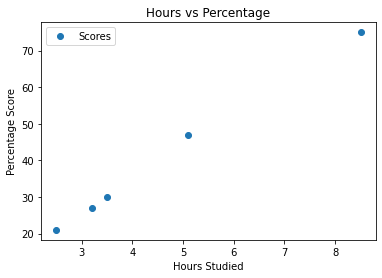

In [59]:
dataset.plot(x="Hours", y= "Scores", style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score")
plt.show()

In [60]:
X= dataset.iloc[:,:-1].values #to only have the values of hours in form of numpy array
y= dataset.iloc[:,1].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
print(regressor.intercept_)
print(regressor.coef_) #for every one unit of change in hour, the change in score is 9%

-0.9729729729729826
[9.02509653]


In [64]:
#prediction on test
y_pred= regressor.predict(X_test)#output is numpy array

In [65]:
# looking correctness of predictions
df=pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,27,27.907336


In [66]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9073359073359022
Mean Squared Error: 0.8232584487410649
Root Mean Squared Error: 0.9073359073359022


### Multiple Linear Regression

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
dataset = pd.read_csv('petrol_consumption.csv')

In [69]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [70]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [71]:
#Preparing data
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petrol_tax", there is a decrease of 24.19 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

In [75]:
y_pred = regressor.predict(X_test)

In [76]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [77]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517


You can see that the value of root mean squared error is 60.07, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

### Decision Tree Classifier

In [78]:
# Sample Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
